# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/drive/folders/1MXmIChMxodGbEpowyVJBFLdvaDpj23gd?usp=sharing


## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [ ]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [ ]:
df = pd.read_csv('./heights.csv')

In [ ]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


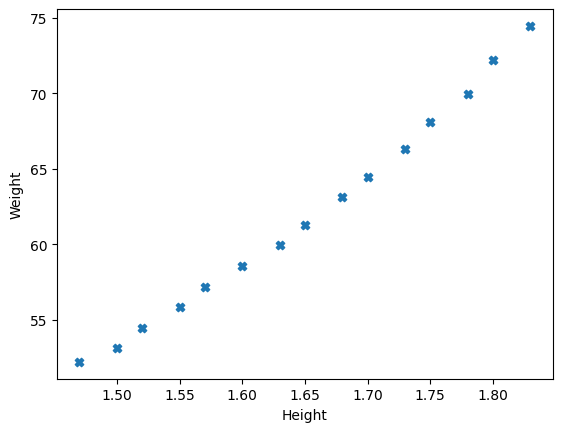

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [ ]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.0001, epochs=30):
        """
        Initialize a linear regression model.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = np.random.randn()

    def train(self, X, y):
        """
        Train the linear regression model using batch gradient descent.

        Args:
            X: features (numpy array)
            y: target (numpy array)
        """
        n_samples, n_features = X.shape
        self.w = np.random.randn(n_features)
        m = len(y)
        for _ in range(self.epochs):
            y_pred = self.predict(X)

            dw = (-2/m)*np.dot(X.T, (y-y_pred))
            db = (-2/m)*np.sum(y-y_pred)
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights using batch gradient descent.

        Args:
            X: features (numpy array)
            y: target (numpy array)
        """

    def predict(self, X):
        """
        Predict values using the linear regression model.

        Args:
            X: features (numpy array)

        Returns:
            numpy array: The predicted values.
        """
        return np.dot(X,self.w) + self.b
    def get(self):
      return (self.w,self.b)


### Build the model and train on the dataset.

In [ ]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [ ]:
def mean_squared_error(y_pred, y_actual):
    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """
    error = 0
    for i in range(len(y_pred)):
        error += (y_pred[i] - y_actual[i]) ** 2
    return error / len(y_pred)  # Calculate the average error


### Make predictions using the model and evaluate it.

In [ ]:
y_pred = model.predict(X_train)
mse= mean_squared_error(y_pred, y_train)
print("Train MSE: "+str(mse))

Train MSE: 0.4993998564106056


### Plot the predicted and the actual values.

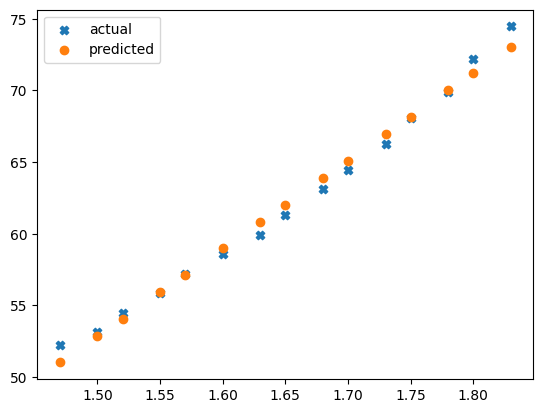

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [ ]:
df = pd.read_csv('./advertise.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

### (5 points) Normalize the features in your dataset.

Gradient descent-based models can be sensitive to different scales of the features/independent variables. Hence, it is important to normalize them. You may use the functions, `dataset_minmax`, `normalize_dataset`, and `unnormalize_dataset`, provided in the code block below to perform [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling) on the features.

In [ ]:
def dataset_minmax(dataset):
    """
    Finds the min and max values for each column.
    """
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

def normalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to the range 0-1.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return dataset

def unnormalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to their original values.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = minmax[i][0] + (minmax[i][1] - minmax[i][0]) * row[i]
    return dataset

In [ ]:
######################
#   YOUR CODE HERE   #
######################
minmax = dataset_minmax(X)
norm_data = normalize_dataset(X,minmax)


### Split the data into train and test set.

In [ ]:
def split_indices(n, test_frac, seed):
    """
    Provides indices for creating training and test set.
    """
    # Determine the size of the test set
    n_test = int(test_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_test indices for test set
    return idxs[n_test:], idxs[:n_test]

In [ ]:
test_frac = 0.2 ## Set the fraction for the test set
rand_seed = 42 ## Set the random seed

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 160
#samples in test set: 40


In [ ]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

### Build the model and train on the dataset.

In [ ]:
model2 = LinearRegression(0.01, 100000)
model2.train(X_train, y_train)

### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [ ]:
print("Training MSE: {:.4f}".format(mean_squared_error(model2.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model2.predict(X_test), y_test)))

Training MSE: 2.6761
Test MSE: 2.9078


# Using Closed Form Solution(75)


* For both the above 2 models you need to try out the closed form solutions
* The more efforts you put in, the more marks you get.
* It is open ended

In [ ]:
#for first model
(m,c) = model.get()
print(f"y = {m[0]}*x + {c}")

#for second model
(m,c) = model2.get()
print("y = "+str(' '.join([f"{ele}*x_{i} +" for i,ele in enumerate(m)]))+f" {c}")

y = 61.22320078151842*x + -38.98083212012652
y = 16.11839138656711*x_0 + 5.0068899746903215*x_1 + 0.4930767436656409*x_2 + 4.753583885846188


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [ ]:
df = pd.read_csv('./heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [ ]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [ ]:
class LogisticRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a logistic regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        self.m = None
        self.c = np.random.randn()

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict_prob(self, X):
        return self.sigmoid(np.dot(X, self.m) + self.c)

    def predict(self, X):
        return (self.predict_prob(X) >= 0.5).astype(int)

    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        samples, features = X.shape
        self.m = np.random.randn(features)
        for _ in range(self.epochs):
            y_pred = self.predict_prob(X)

            dm = (-1/samples) * np.dot(X.T, (y - y_pred))
            dc = (-1/samples) * np.sum(y - y_pred)

            self.m -= self.lr * dm
            self.c -= self.lr * dc





    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights in gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################


### Build the model and train on the dataset.

In [ ]:
model = LogisticRegression(0.1, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

In [ ]:
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The accuracy.
    """
    ######################
    #   YOUR CODE HERE   #
    ######################
    n = len(y_pred)
    correct = 0
    for i in range(n):
      if y_pred[i] == y_actual[i]:
        correct +=1
    return correct/n



### Make predictions using the model and evaluate it.

In [ ]:
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

Train Accuracy: 1.0


### Plot the predicted and the actual values.

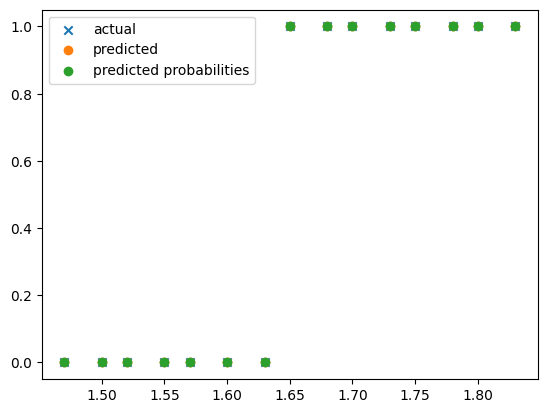

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')
plt.legend()
plt.show()

# ** Use the Newton Raphson Method for the same** (75 marks)


In [ ]:
#used : https://thelaziestprogrammer.com/sharrington/math-of-machine-learning/solving-logreg-newtons-method

def sigmoid(x, Θ_1, Θ_2):
    z = (Θ_1*x + Θ_2).astype("float_")
    return 1.0 / (1.0 + np.exp(-z))
def log_likelihood(x, y, Θ_1, Θ_2):
    sigmoid_probs = sigmoid(x, Θ_1, Θ_2)
    return np.sum(y * np.log(sigmoid_probs)
                  + (1 - y) * np.log(1 - sigmoid_probs))
def gradient(x, y, Θ_1, Θ_2):
    sigmoid_probs = sigmoid(x, Θ_1, Θ_2)
    return np.array([[np.sum((y - sigmoid_probs) * x),
                     np.sum((y - sigmoid_probs) * 1)]])

def hessian(x, y, Θ_1, Θ_2):
    sigmoid_probs = sigmoid(x, Θ_1, Θ_2)
    d1 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x * x)
    d2 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x * 1)
    d3 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * 1 * 1)
    H = np.array([[d1, d2],[d2, d3]])
    return H

def newtons_method(x, y):
    """
    :param x (np.array(float)): Vector of Boston House Values in dollars
    :param y (np.array(boolean)): Vector of Bools indicting if house has > 2 bedrooms:
    :returns: np.array of logreg's parameters after convergence, [Θ_1, Θ_2]
    """
    Θ_1 = np.random.rand()
    Θ_2 = np.random.rand()
    Δl = np.Infinity
    l = log_likelihood(x, y, Θ_1, Θ_2)
    # Convergence Conditions
    δ = .00001
    max_iterations = 1500
    i = 0
    while abs(Δl) > δ and i < max_iterations:
        i += 1
        g = gradient(x, y, Θ_1, Θ_2)
        hess = hessian(x, y, Θ_1, Θ_2)
        H_inv = np.linalg.inv(hess)
        Δ = H_inv @ g.T
        ΔΘ_1 = Δ[0][0]
        ΔΘ_2 = Δ[1][0]

        # Perform our update step
        Θ_1 += ΔΘ_1
        Θ_2 += ΔΘ_2

        l_new = log_likelihood(x, y, Θ_1, Θ_2)
        Δl = l - l_new
        l = l_new
    return np.array([Θ_1, Θ_2])
[t1,t2] = newtons_method(X_train,y_train)


<ipython-input-82-3256226775f0>:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-82-3256226775f0>:8: RuntimeWarning: divide by zero encountered in log
  return np.sum(y * np.log(sigmoid_probs)
<ipython-input-82-3256226775f0>:8: RuntimeWarning: invalid value encountered in multiply
  return np.sum(y * np.log(sigmoid_probs)
<ipython-input-82-3256226775f0>:9: RuntimeWarning: divide by zero encountered in log
  + (1 - y) * np.log(1 - sigmoid_probs))
<ipython-input-82-3256226775f0>:9: RuntimeWarning: invalid value encountered in multiply
  + (1 - y) * np.log(1 - sigmoid_probs))


In [ ]:
sigmoid(X_train,t1,t2)


<ipython-input-82-3256226775f0>:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
######################
#   YOUR CODE HERE   #
######################

# K Means Clustering(100 marks)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the two Gaussians
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([1, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

mu3 = np.array([-10, 8])
Sigma3 = np.array([[2, 0], [0, 2]])



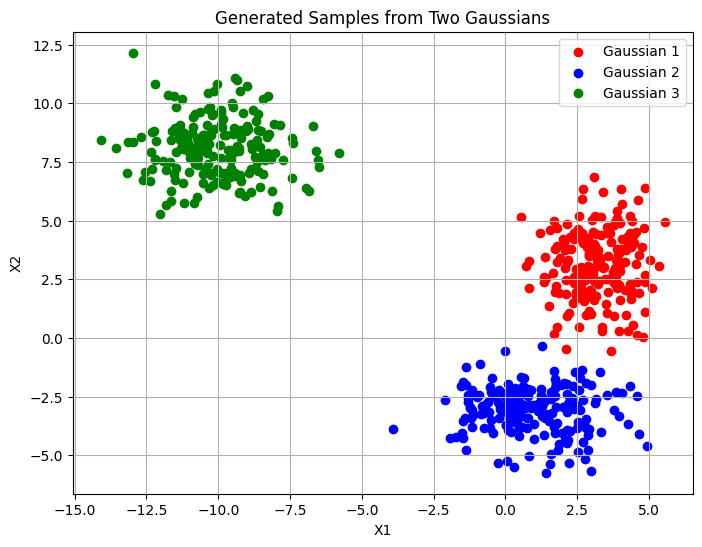

In [ ]:
n_samples = 200
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)
samples3 = np.random.multivariate_normal(mu3, Sigma3, n_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples3[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Samples from Two Gaussians')
plt.legend()
plt.grid(True)
plt.show()

The above is the dataset generated from 3 gaussians, and a visualizations for the same, You need to assume that you have the data and then you use k means for the same your output should be similar to what is shown above

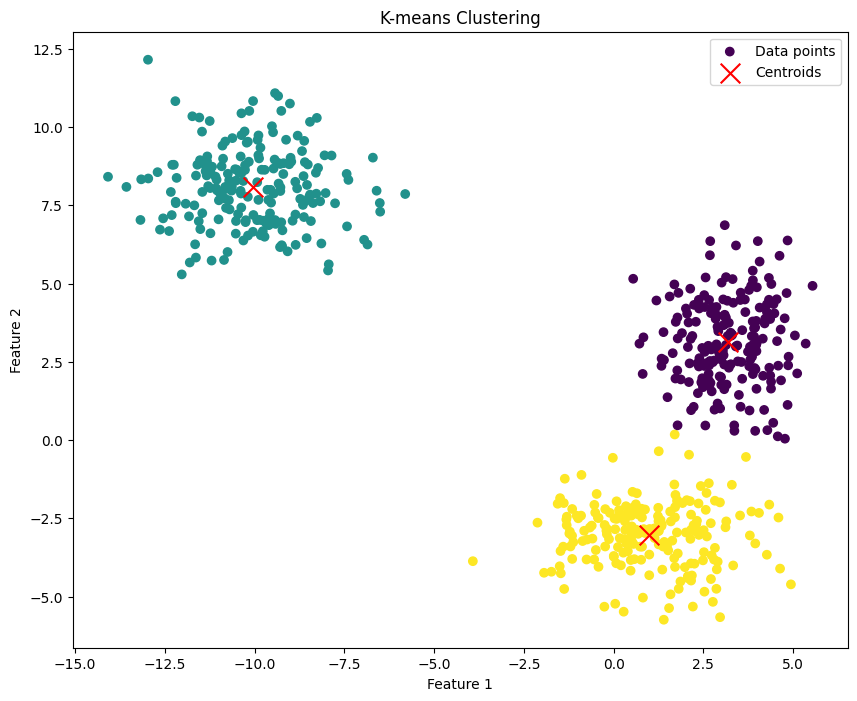

In [ ]:
X = np.vstack((samples1, samples2, samples3))

def k_means(X, k, max_iters=100):

    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)

        new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

        centroids = new_centroids

    return clusters, centroids

k = 3
clusters, centroids = k_means(X, k)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()